1.1 Задание № 1
Напишите функциидля генерации случайных величин имеющих следующие
распределения:
1. Бернулли с параметром p;
2. Биномиальное с параметрами n, p;
3. Геометрическое с параметром p;
4. Пуассона с параметром λ;
5. Равномерное на отрезке [a; b];
6. Показательное с параметром α;
7. Лапласа с параметром α;
8. Нормальное с параметрами a и σ2 (если Y — стандартное нормальное
распределение, то в этом пункте речь идёт о σY + a);
9. Распределения Коши;
10. Распределения, заданного ядром $
f(t) = \frac{1}{t^3}I_{t > 1}
$

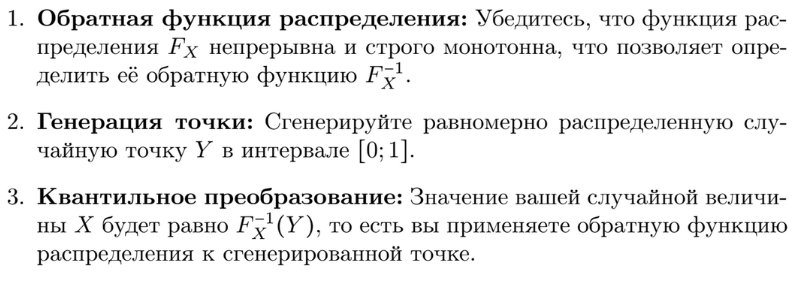

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (
    norm, uniform, expon, laplace, cauchy, gamma, bernoulli, binom, geom, poisson, uniform, expon, laplace,
    norm, cauchy, gamma, beta, skew, kurtosis
)

In [3]:
def generate_bernoulli(p, size = 1): #discret
    u = np.random.uniform(0, 1, size)
    return(u < p).astype(int)

def generate_binominal(n, p, size = 1): #discret
    return np.sum(generate_bernoulli(p, size = (size, n)), axis=1)

def generate_geometric(p, size = 1): #discret
    u = np.random.uniform(0, 1, size)
    return np.ceil(np.log(1 - u) / np.log(1 - p))

def generate_poisson(lam, size = 1): #discret
    return np.random.poisson(lam, size)

def generate_uniform(a, b, size = 1):
    u = np.random.uniform(0, 1, size)
    return a + (b - a) * u

def generate_exponential(alpha, size = 1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / alpha

def generate_laplace(alpha, size = 1):
    u = np.random.uniform(0, 1, size)
    sign = np.sign(u - 0.5)
    return sign * generate_exponential(alpha, size)

def generate_normal(mu, sigma2, size = 1):
    return np.random.normal(mu, np.sqrt(sigma2), size)

def generate_koshi(size = 1):
    u = np.random.uniform(0, 1, size)
    return np.tan(np.pi * (u - 0.5))

def generate_custom(size = 1):
    u = np.random.uniform(0, 1, size)
    return 1 / np.sqrt(1 - u)


In [21]:
generate_bernoulli(0.5, 5)

array([0, 1, 0, 0, 1])

/tmp/ipykernel_10376/3599489613.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


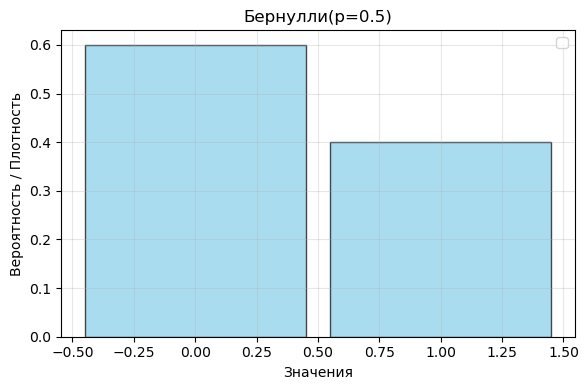

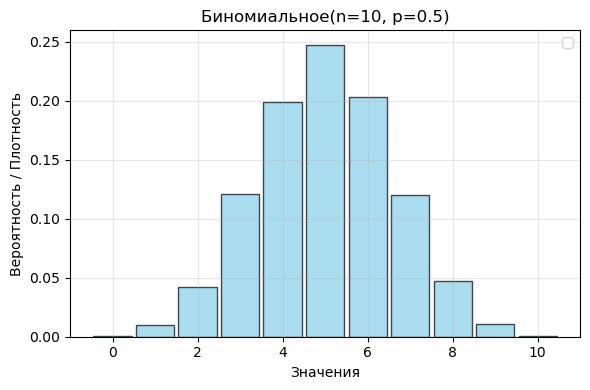

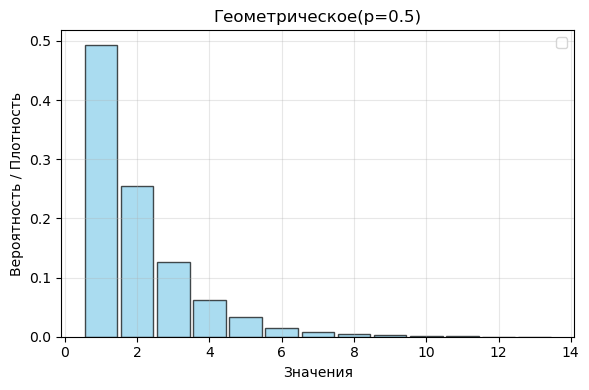

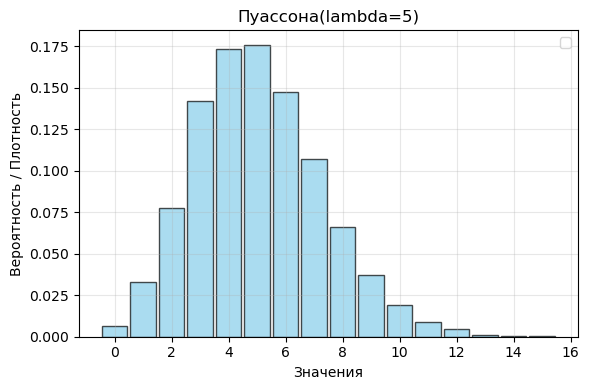

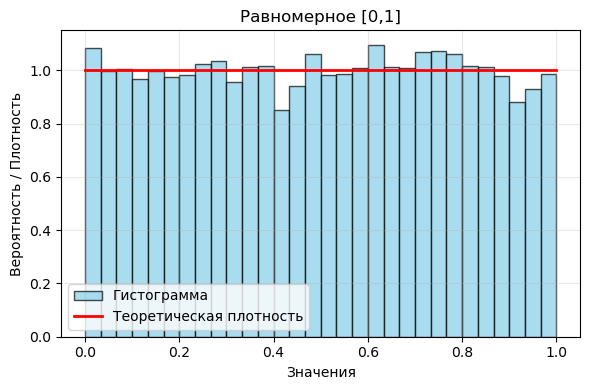

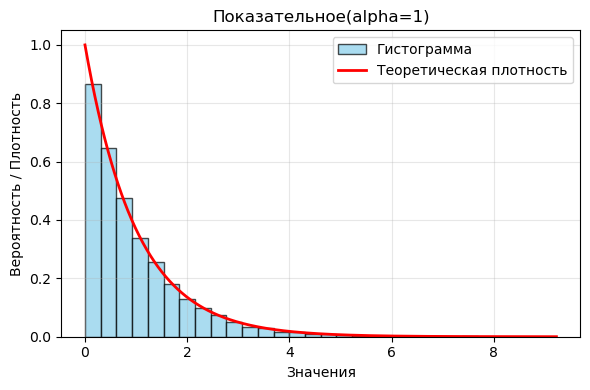

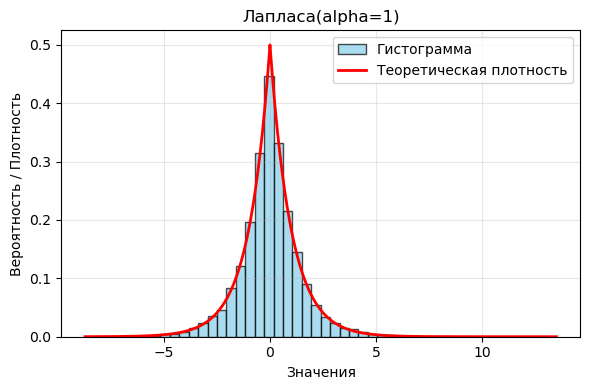

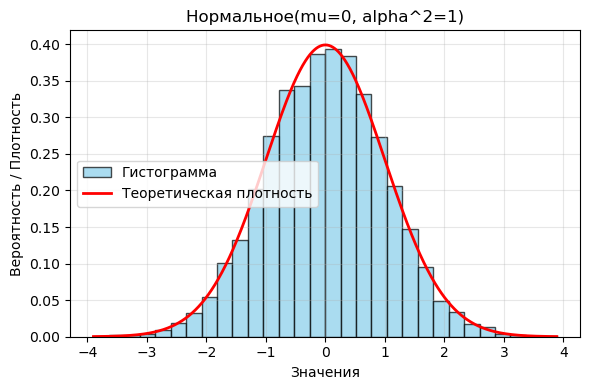

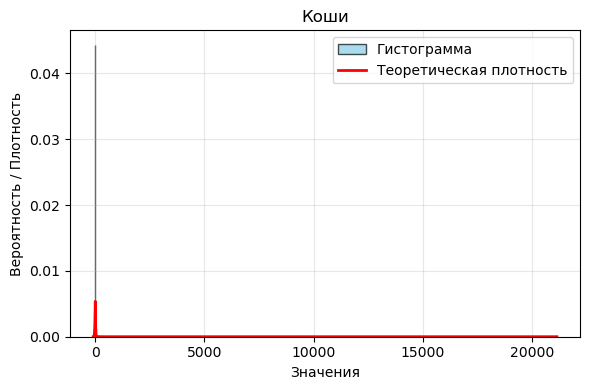

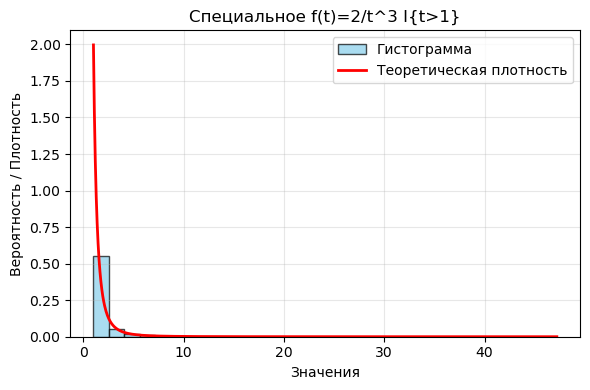

In [14]:
# def distribution_plt(generate_func, params, title, bins=30, is_discrete=False, theoretical=None, size=10000):
#     data = generate_func(*params, size=size)
#     plt.hist(data, bins=bins, density=True, alpha=0.6, label='Гистограмма')
#     if theoretical:
#         x = np.linspace(min(data), max(data), 1000)
#         plt.plot(x, theoretical(x), 'r-', label='Теоретическая плотность')
#     plt.title(title)
#     plt.legend()
#     plt.show()

def distribution_plt(generate_func, params, title, bins=30, 
                    is_discrete=False, theoretical=None, size=10000):
    data = generate_func(*params, size=size)
    
    if is_discrete:
        # Для дискретных — лучше столбиковая диаграмма (bar plot)
        unique, counts = np.unique(data, return_counts=True)
        probs = counts / len(data)
        plt.bar(unique, probs, width=0.9, alpha=0.7, color='skyblue', 
                edgecolor='black')
        
        if theoretical:
            x_theor = np.arange(min(unique)-1, max(unique)+2)
            plt.plot(x_theor, theoretical(x_theor), 'ro', markersize=8, 
                     label='Теоретические вероятности')
    else:
        # Для непрерывных — обычная гистограмма
        plt.hist(data, bins=bins, density=True, alpha=0.7, color='skyblue', 
                 edgecolor='black', label='Гистограмма')
        
        if theoretical:
            x = np.linspace(min(data), max(data), 1000)
            plt.plot(x, theoretical(x), 'r-', lw=2, label='Теоретическая плотность')
    
    plt.title(title)
    plt.xlabel('Значения')
    plt.ylabel('Вероятность / Плотность')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

distribution_plt(generate_bernoulli, (0.5,), 'Бернулли(p=0.5)', bins=2, is_discrete=True, size= 10)
distribution_plt(generate_binominal, (10, 0.5), 'Биномиальное(n=10, p=0.5)', bins=11, is_discrete=True, size=10000)
distribution_plt(generate_geometric, (0.5,), 'Геометрическое(p=0.5)', bins=20, is_discrete=True)
distribution_plt(generate_poisson, (5,), 'Пуассона(lambda=5)', bins=20, is_discrete=True)
distribution_plt(generate_uniform, (0, 1), 'Равномерное [0,1]', bins=30, theoretical=lambda x: uniform.pdf(x, 0, 1))
distribution_plt(generate_exponential, (1,), 'Показательное(alpha=1)', bins=30, theoretical=lambda x: expon.pdf(x, scale=1))
distribution_plt(generate_laplace, (1,), 'Лапласа(alpha=1)', bins=50, theoretical=lambda x: laplace.pdf(x, scale=1), size=10000)
distribution_plt(generate_normal, (0, 1), 'Нормальное(mu=0, alpha^2=1)', bins=30, theoretical=lambda x: norm.pdf(x), size= 10000)
distribution_plt(generate_koshi, (), 'Коши', bins=1000, theoretical=lambda x: cauchy.pdf(x), size= 500)
distribution_plt(generate_custom, (), 'Специальное f(t)=2/t^3 I{t>1}', bins=30, theoretical=lambda x: (x > 1) * 2 / x**3, size = 1000)

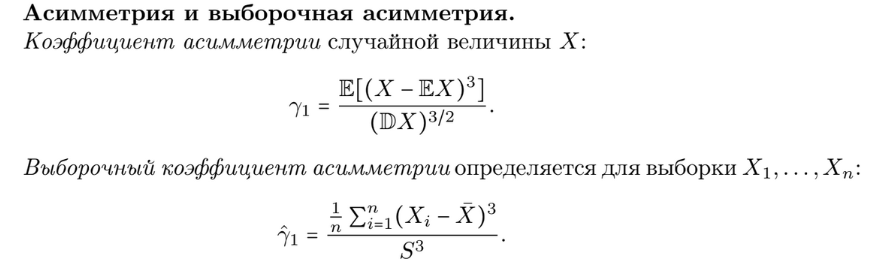

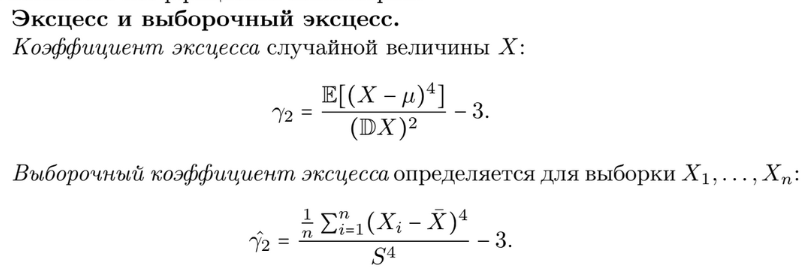

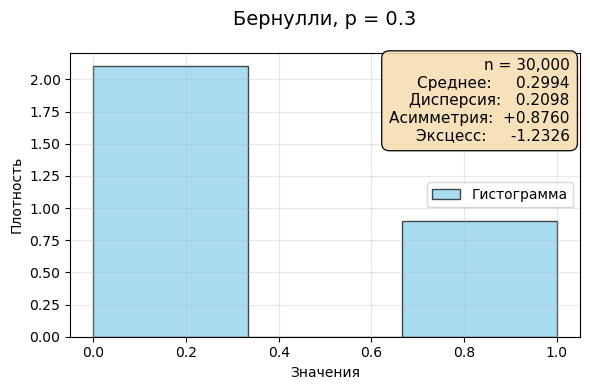

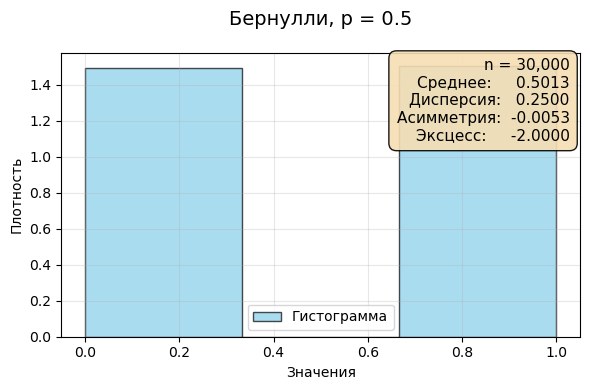

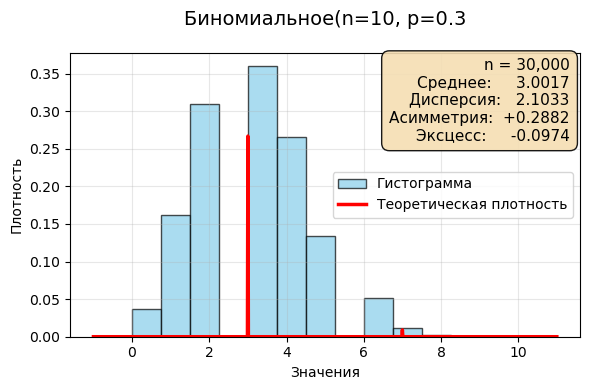

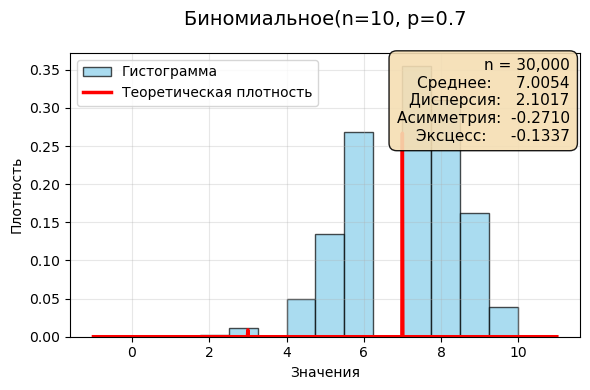

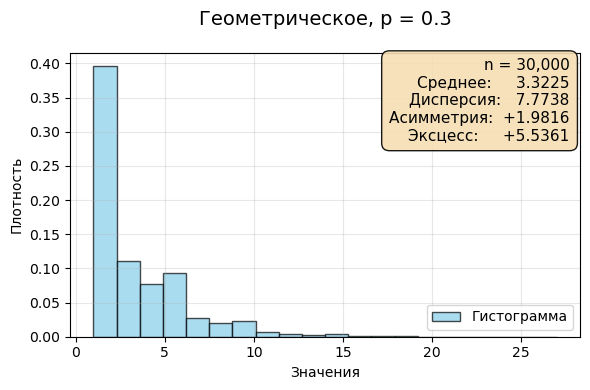

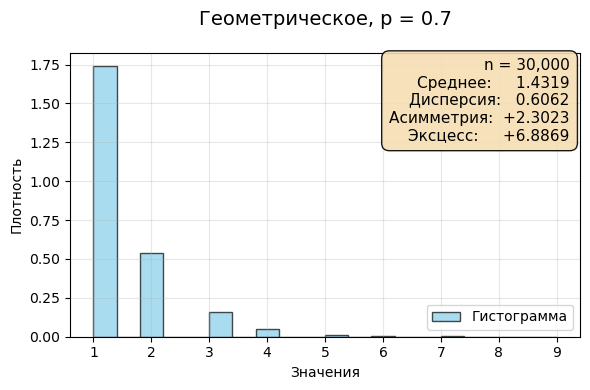

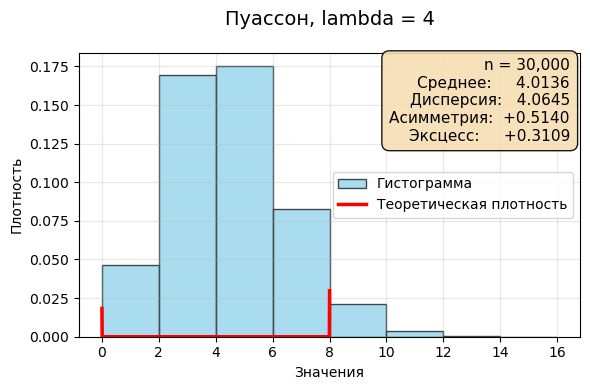

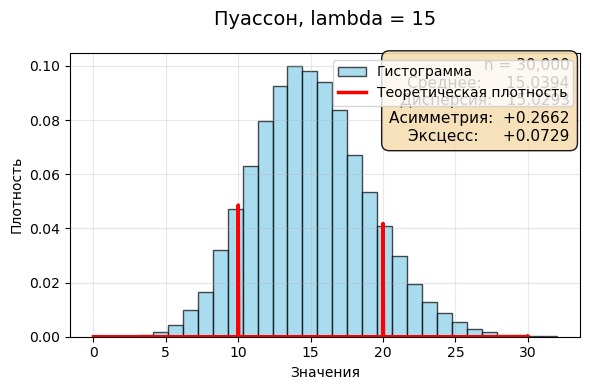

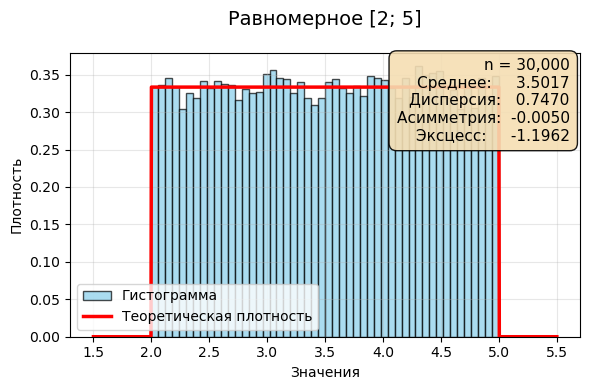

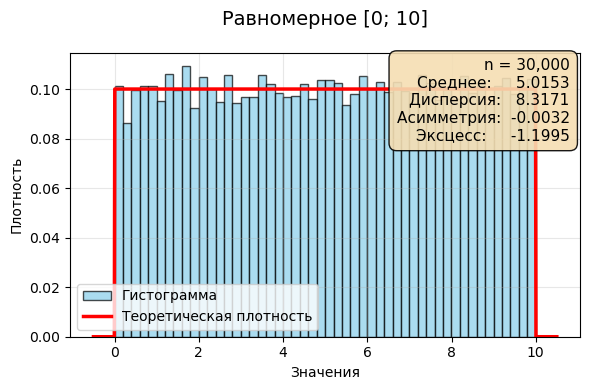

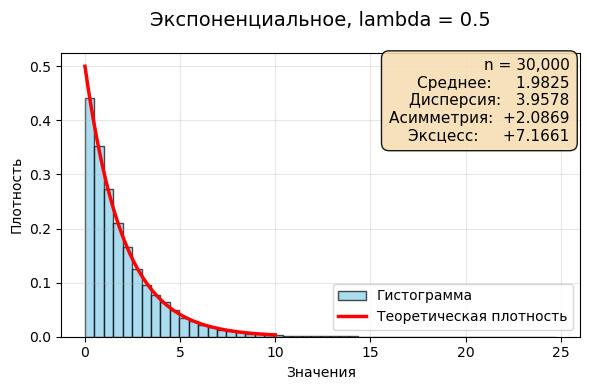

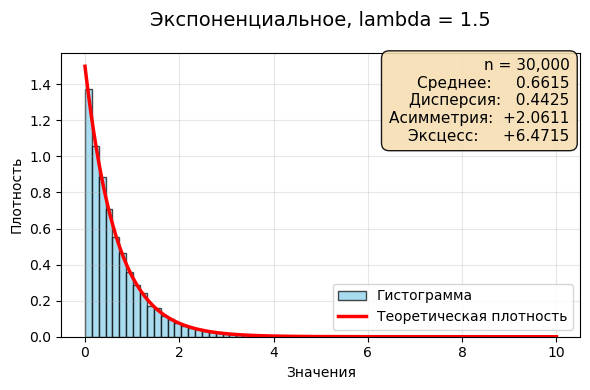

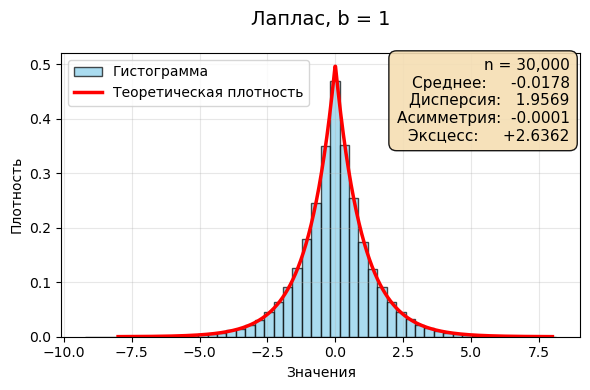

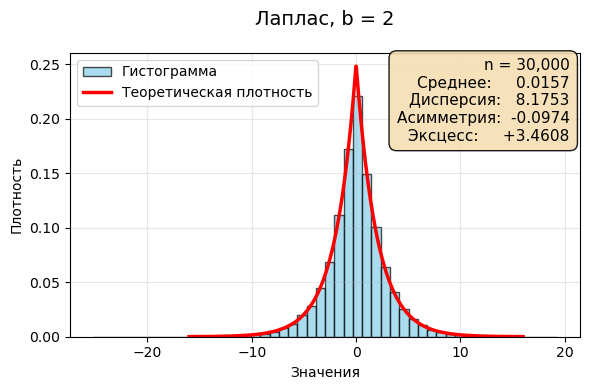

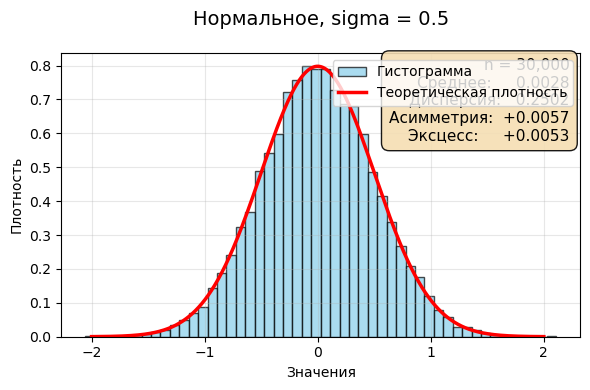

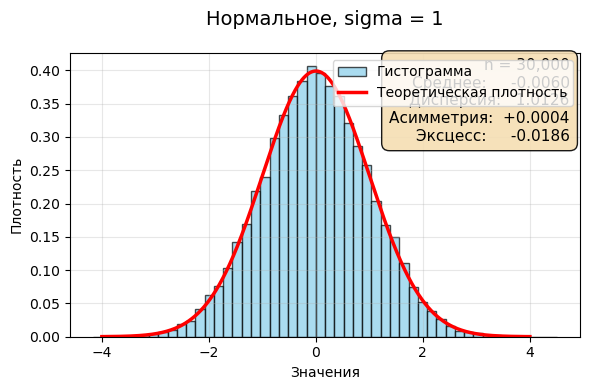

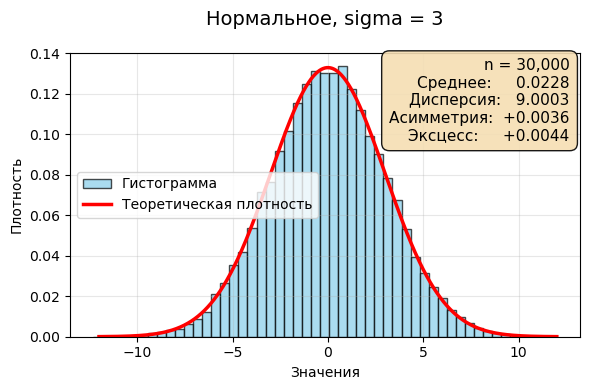

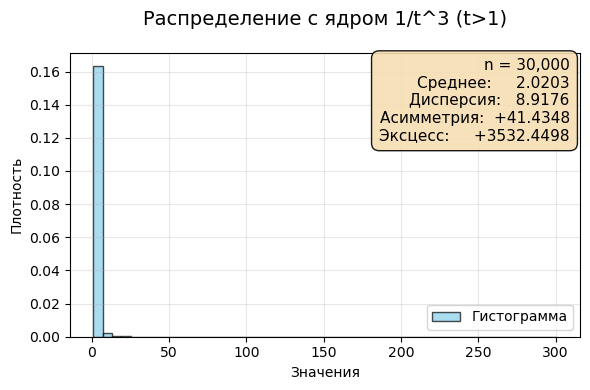


гамма (shape alpha, scale=1)


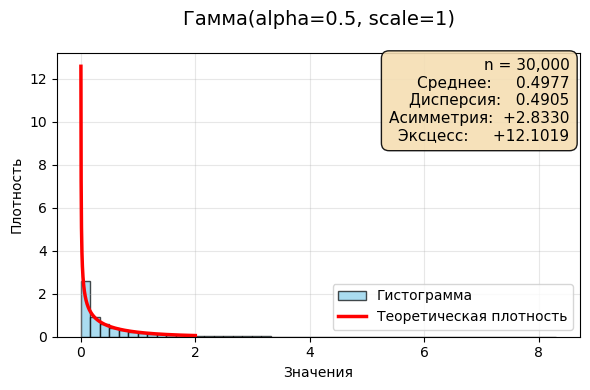

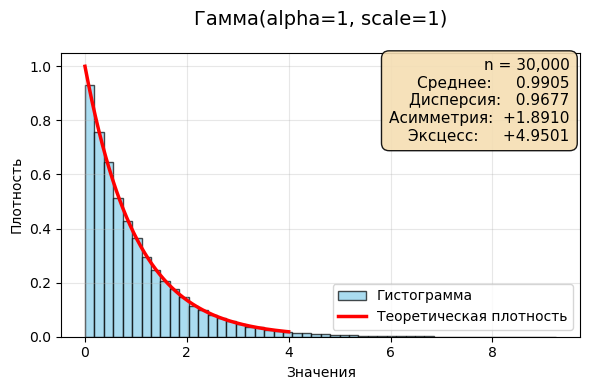

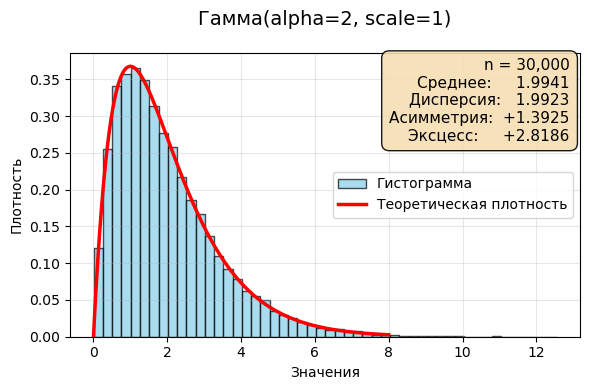

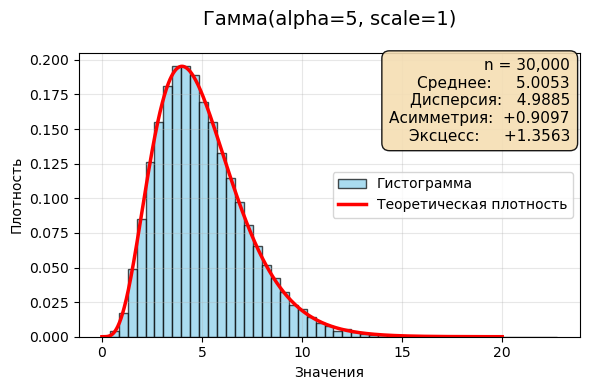

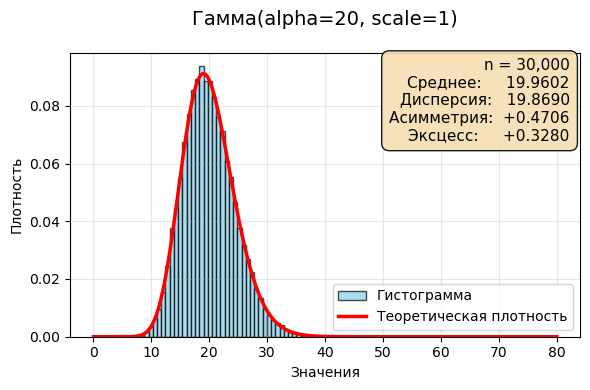


бета


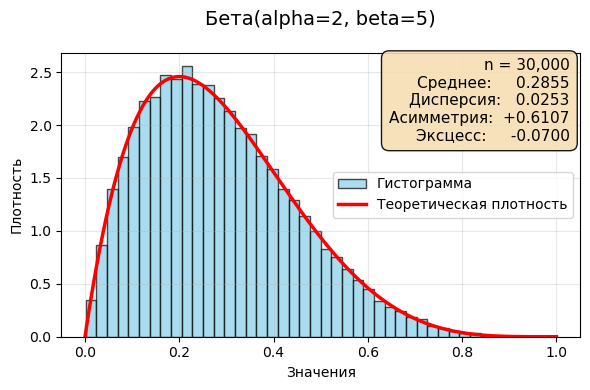

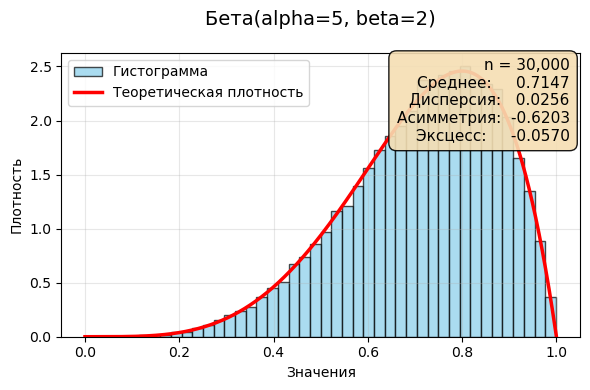

In [12]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10

def plot_with_stats(data, title, pdf_func=None, x_min=None, x_max=None, bins=50):
    # выборочное среднее
    mean = np.mean(data)
    #выборочная дисперсия
    var = np.var(data, ddof=1)
    # выборочный коэф ассиметрии
    skewness = skew(data)
    #выборочный эксцесс
    kurt = kurtosis(data)

    plt.hist(data, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Гистограмма')

    if pdf_func is not None and x_min is not None and x_max is not None:
        x = np.linspace(x_min, x_max, 1000)
        plt.plot(x, pdf_func(x), 'r-', lw=2.5, label='Теоретическая плотность')

    stats_text = f'n = {len(data):,}\n' \
                 f'Среднее:     {mean:.4f}\n' \
                 f'Дисперсия:   {var:.4f}\n' \
                 f'Асимметрия:  {skewness:+.4f}\n' \
                 f'Эксцесс:     {kurt:+.4f}'

    plt.text(0.98, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="wheat", alpha=0.9),
             fontsize=11)

    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

np.random.seed(123)
N = 30000  

# 1. Бернулли
for p in [0.3, 0.5]:
    data = bernoulli.rvs(p, size=N)
    plot_with_stats(data, f"Бернулли, p = {p}", x_min=-0.2, x_max=1.2, bins=3)

# 2. Биномиальное
for n, p in [(10, 0.3), (10, 0.7)]:
    data = binom.rvs(n, p, size=N)
    plot_with_stats(data, f"Биномиальное(n={n}, p={p}", 
                    pdf_func=lambda x: binom.pmf(x, n, p),
                    x_min=-1, x_max=n+1, bins=n+2)

# 3. Геометрическое
for p in [0.3, 0.7]:
    data = geom.rvs(p, size=N)
    plot_with_stats(data, f"Геометрическое, p = {p}", x_min=0, x_max=20, bins=20)

# 4. Пуассон
for lam in [4, 15]:
    data = poisson.rvs(lam, size=N)
    plot_with_stats(data, f"Пуассон, lambda = {lam}", 
                    pdf_func=lambda x: poisson.pmf(x, lam),
                    x_min=0, x_max=lam*2, bins=int(lam*2))

# 5. Равномерное
for a, b in [(2,5), (0,10)]:
    data = uniform.rvs(a, b-a, size=N)
    plot_with_stats(data, f"Равномерное [{a}; {b}]", 
                    pdf_func=lambda x: uniform.pdf(x, a, b-a),
                    x_min=a-0.5, x_max=b+0.5)

# 6. Экспоненциальное
for rate in [0.5, 1.5]:
    data = expon.rvs(scale=1/rate, size=N)
    plot_with_stats(data, f"Экспоненциальное, lambda = {rate}", 
                    pdf_func=lambda x: expon.pdf(x, scale=1/rate),
                    x_min=0, x_max=10)

# 7. Лаплас
for b in [1, 2]:
    data = laplace.rvs(scale=b, size=N)
    plot_with_stats(data, f"Лаплас, b = {b}", 
                    pdf_func=lambda x: laplace.pdf(x, scale=b),
                    x_min=-8*b, x_max=8*b)

# 8. Нормальное
for sigma in [0.5, 1, 3]:
    data = norm.rvs(loc=0, scale=sigma, size=N)
    plot_with_stats(data, f"Нормальное, sigma = {sigma}", 
                    pdf_func=lambda x: norm.pdf(x, 0, sigma),
                    x_min=-4*sigma, x_max=4*sigma)

# 10. Специальное: f(t) = 1/t^3, t>1
data = 1 / np.sqrt(np.random.uniform(0, 1, N))
plot_with_stats(data, "Распределение с ядром 1/t^3 (t>1)", x_min=1, x_max=10, bins=50)

# Гамма
print("\nгамма (shape alpha, scale=1)")
for alpha in [0.5, 1, 2, 5, 20]:
    data = gamma.rvs(a=alpha, scale=1, size=N)
    plot_with_stats(data, f"Гамма(alpha={alpha}, scale=1)", 
                    pdf_func=lambda x: gamma.pdf(x, a=alpha, scale=1),
                    x_min=0, x_max=alpha*4)

# бета
print("\nбета")
for a, b in [(2,5), (5,2)]:
    data = beta.rvs(a, b, size=N)
    plot_with_stats(data, f"Бета(alpha={a}, beta={b})", 
                    pdf_func=lambda x: beta.pdf(x, a, b),
                    x_min=0, x_max=1, bins=40)

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def clt_demo(generate_func, params, n_samples, N=10000, mu=None, sigma2=None, title=None):
    sums = np.zeros(N)
    
    for i in range(N):
        data = generate_func(*params, size=n_samples)
        total = data.sum()
        
        # теоритические параметры 
        if mu is None or sigma2 is None:
            # Автоопределение по типу функции
            if generate_func == generate_bernoulli:
                p = params[0]
                mu, sigma2 = p, p*(1-p)
            elif generate_func == generate_binominal:
                n, p = params
                mu, sigma2 = n*p, n*p*(1-p)
            elif generate_func == generate_geometric:
                p = params[0]
                mu, sigma2 = 1/p, (1-p)/p**2
            elif generate_func == generate_poisson:
                lam = params[0]
                mu, sigma2 = lam, lam
            elif generate_func == generate_uniform:
                a, b = params
                mu, sigma2 = (a+b)/2, (b-a)**2 / 12
            elif generate_func == generate_exponential:
                alpha = params[0]
                mu, sigma2 = 1/alpha, 1/alpha**2
            elif generate_func == generate_laplace:
                alpha = params[0]
                mu, sigma2 = 0, 2/alpha**2
            elif generate_func == generate_normal:
                mu, sigma2 = params
            elif generate_func == generate_koshi:

                print("Коши — ЦПТ не применима!")
                return
            else:
                mu, sigma2 = np.mean(data), np.var(data)
        
        sums[i] = (total - n_samples * mu) / np.sqrt(n_samples * sigma2)
    
    # --- График ---
    plt.figure(figsize=(10, 6))
    plt.hist(sums, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Гистограмма')
    x = np.linspace(-4, 4, 200)
    plt.plot(x, norm.pdf(x), 'r-', lw=2, label='N(0,1)')
    plt.xlim(-4, 4)
    plt.ylim(0, 0.5)
    plt.title(title or f'ЦПТ: {generate_func.__name__}, n = {n_samples}')
    plt.xlabel('Стандартизованная сумма')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

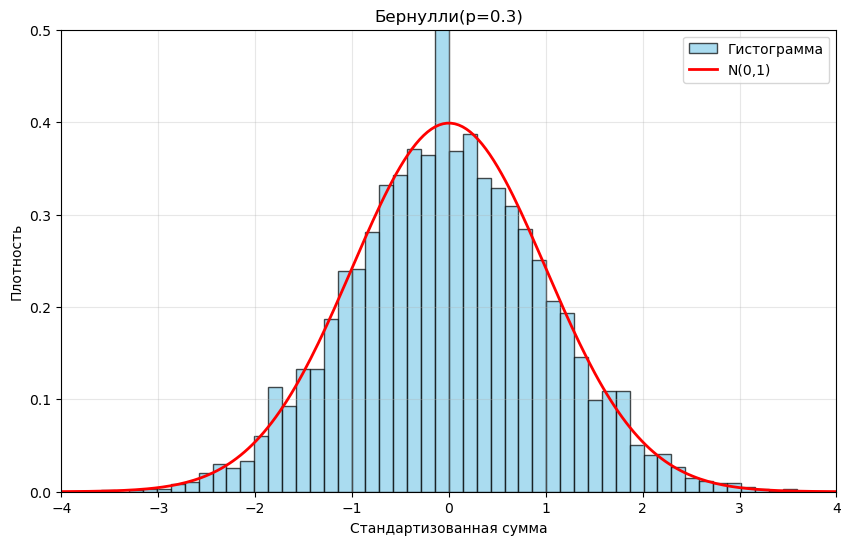

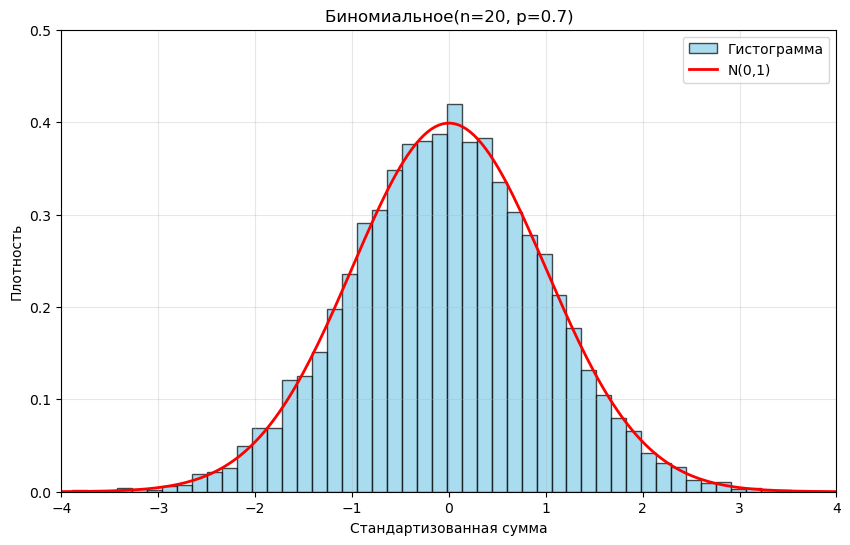

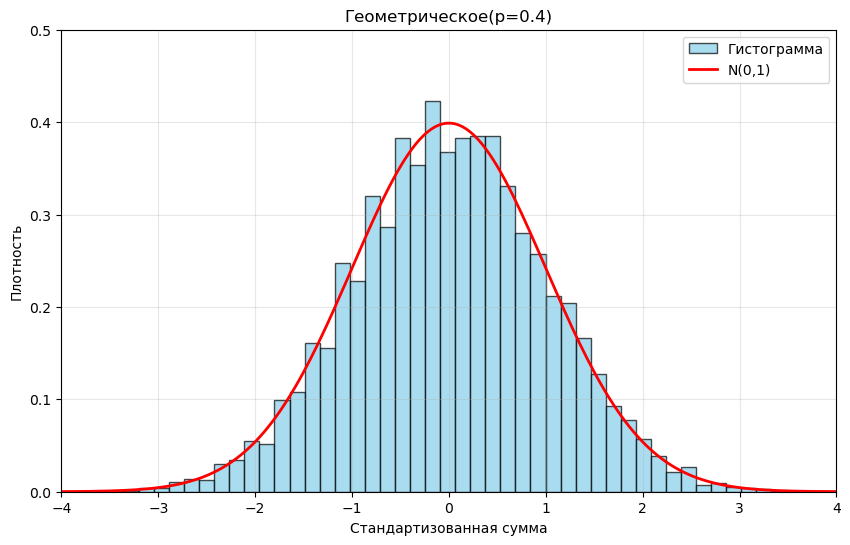

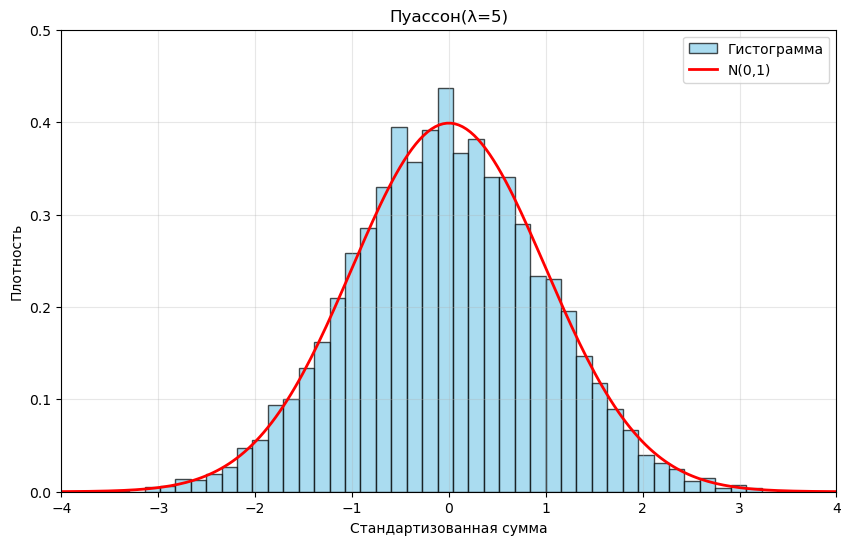

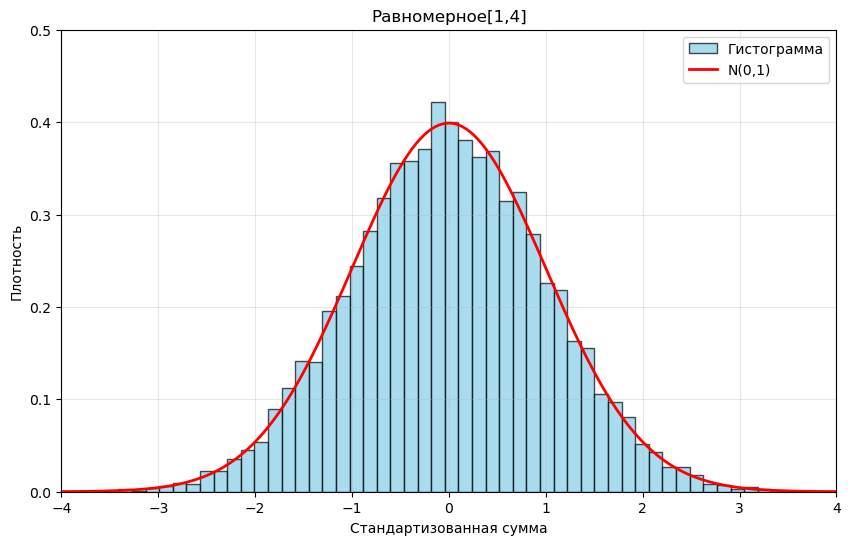

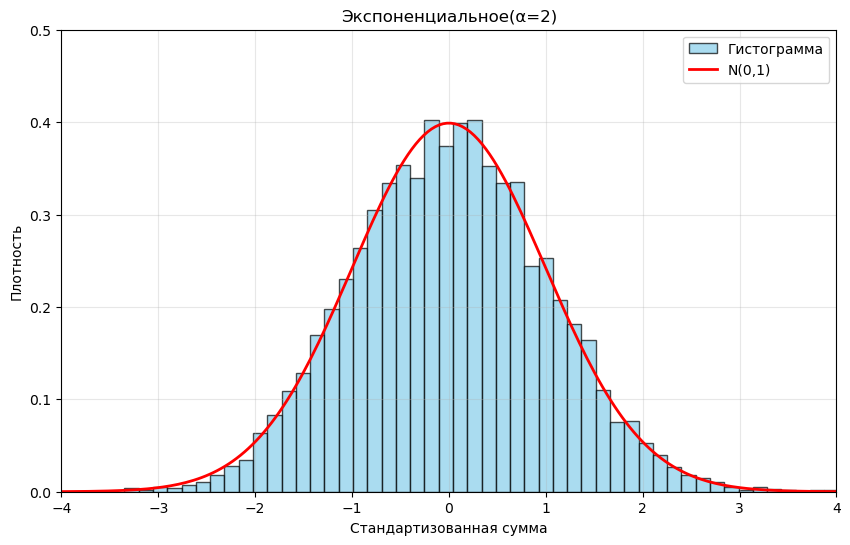

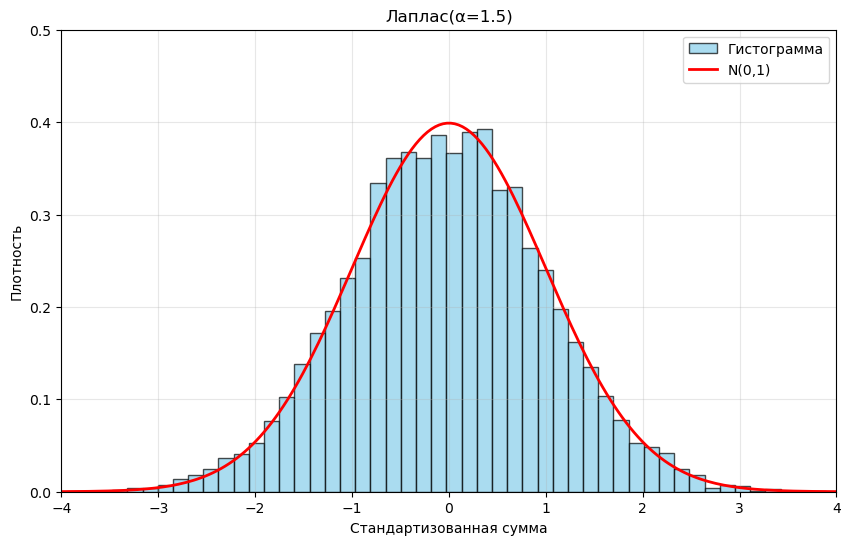

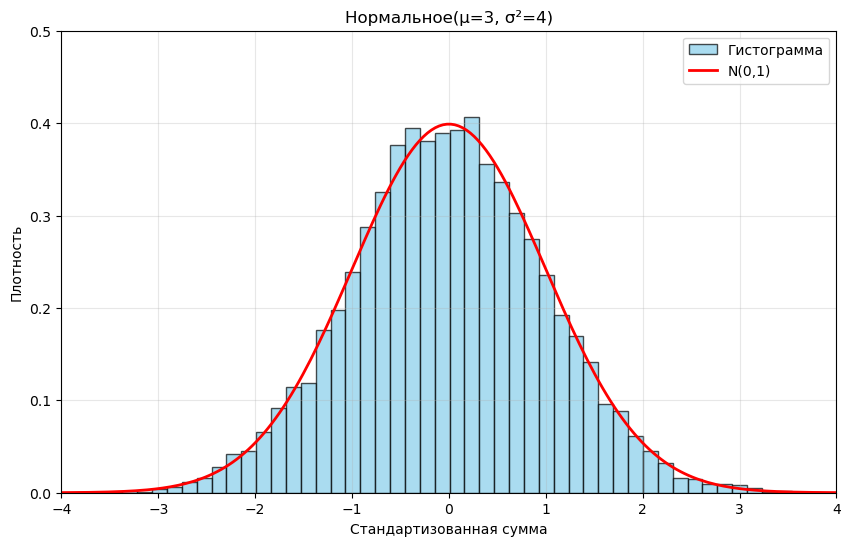

Внимание: Коши — ЦПТ не применима!


In [ ]:
# 1. Бернулли
clt_demo(generate_bernoulli, (0.3,), 1000, title="Бернулли(p=0.3)")

# 2. Биномиальное
clt_demo(generate_binominal, (20, 0.7), 1000, title="Биномиальное(n=20, p=0.7)")

# 3. Геометрическое
clt_demo(generate_geometric, (0.4,), 1000, title="Геометрическое(p=0.4)")

# 4. Пуассон
clt_demo(generate_poisson, (5,), 1000, title="Пуассон(lambda=5)")

# 5. Равномерное
clt_demo(generate_uniform, (1, 4), 1000, title="Равномерное[1,4]")

# 6. Экспоненциальное
clt_demo(generate_exponential, (2,), 1000, title="Экспоненциальное(alpha=2)")

# 7. Лаплас
clt_demo(generate_laplace, (1.5,), 1000, title="Лаплас(alpha=1.5)")

# 8. Нормальное
clt_demo(generate_normal, (3, 4), 1000, title="Нормальное(mu=3, sigma^2=4)")

# 9. Коши — НЕ РАБОТАЕТ!
clt_demo(generate_koshi, (), 1000, title="Коши — ЦПТ не применима!")